## Import libraries

In [142]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

import matplotlib.pyplot as plt

## Import data

In [143]:
os.getcwd()

'C:\\Users\\1011696\\OneDrive - CavinKare Private Limited\\My files\\Python Scripts\\SSFA_tso\\Code'

In [144]:
path = 'C:\\Users\\1011696\\OneDrive - CavinKare Private Limited\\My files\\Python Scripts\\SSFA_tso\\Data\\'

In [145]:
df = pd.read_csv(path + 'Pan India TSO Incentive JC 8 to JC 13.csv')

## Exploratory Data analysis & preprocessing

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Region    1728 non-null   object 
 1   TSO Code  1728 non-null   int64  
 2   TSO Name  1728 non-null   object 
 3   Type      1728 non-null   object 
 4   Status    1728 non-null   object 
 5   JC        1728 non-null   object 
 6   Target    1728 non-null   float64
 7   Ach       1728 non-null   float64
 8   %         1728 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 121.6+ KB


In [147]:
df.head()

,Region,TSO Code,TSO Name,Type,Status,JC,Target,Ach,%
0,East,7658,Krishanu Sinha,TSO,Active,JC 08,18.52,11.73,63%
1,East,1009447,Sushanta Ranjan Saha,TSO,Active,JC 08,20.00,15.67,78%
2,East,1010285,Saibal Dutta,TSO,Inactive,JC 08,96.50,150.66,156%
3,East,1010336,Vivekananda Banerjee,TSO,Inactive,JC 08,15.24,7.83,51%
4,East,1011396,Dipendu Kundu,TSO,Active,JC 08,15.30,7.56,49%


In [148]:
# Replicate dataframe
df1 = df

# Remove %
df1['%'] = list(map(lambda x: x[:-1], df1['%'].values))

# Convert to numeric
df1['%'] = [float(x) for x in df1['%'].values]

# Rename column
df1.rename(columns={'%': 'Target_Ach'},inplace=True)

# Convert case
df1['TSO Name'] = df1['TSO Name'].str.upper()

### Count of TSO

In [149]:
df1['TSO Code'].nunique()

288

#### Count of TSO - Region wise

In [150]:
df1.groupby(['Region'])['TSO Code'].nunique()

Region
East      64
North     76
South     82
West      66
Name: TSO Code, dtype: int64

#### Count of TSO - Active/Inactive status

In [151]:
df1.groupby(['Status'])['TSO Code'].nunique()

Status
Active      227
Inactive     61
Name: TSO Code, dtype: int64

### Count of TSO with Zero Target & Ach 

In [152]:
df1.groupby(['TSO Code'])['JC'].nunique()
# All TSO have six entries in JC, some entries are 0

TSO Code
1488       6
3282       6
3298       6
3460       6
3708       6
          ..
1014009    6
1014013    6
1014014    6
1014034    6
1014053    6
Name: JC, Length: 288, dtype: int64

In [153]:
df1[(df1['Ach'] == 0) & (df1['Target'] == 0)]['TSO Code'].nunique()

99

#### Count of TSO - Region wise

In [154]:
df1[(df1['Ach'] == 0) & (df1['Target'] == 0)][['TSO Code','Region']].groupby(['Region'])['TSO Code'].nunique()

Region
East      19
North     24
South     28
West      28
Name: TSO Code, dtype: int64

#### Count of TSO - Active/Inactive status

In [155]:
df1[(df1['Ach'] == 0) & (df1['Target'] == 0)][['TSO Code','Status']].groupby(['Status'])['TSO Code'].nunique()

Status
Active      47
Inactive    52
Name: TSO Code, dtype: int64

In [156]:
df1[(df1['Target_Ach'] > 100)].groupby(['Region'])['TSO Code'].nunique()

Region
East      25
North     43
South     38
West      41
Name: TSO Code, dtype: int64

In [229]:
df2 = df1[(df1['Ach'] != 0) & (df1['Target'] != 0)]

## Create TSO master

In [157]:
df.columns

Index(['Region', 'TSO Code', 'TSO Name', 'Type', 'Status', 'JC', 'Target',
       'Ach', 'Target_Ach'],
      dtype='object')

In [158]:
m_tso = df1[['Region', 'TSO Code', 'TSO Name', 'Type', 'Status']].drop_duplicates()

In [159]:
m_tso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    288 non-null    object
 1   TSO Code  288 non-null    int64 
 2   TSO Name  288 non-null    object
 3   Type      288 non-null    object
 4   Status    288 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.5+ KB


## Unmelt data across months

In [160]:
df1['JC'].unique()

array(['JC 08', 'JC 09', 'JC 10', 'JC 11', 'JC 12', 'JC 13'], dtype=object)

In [161]:
# Pivot with columns as months
df_jc = df1.pivot(index='TSO Code', columns='JC',values='Target_Ach')

In [162]:
# Percent change between months
df_jc_pct = df_jc.pct_change(axis=1)
#df_jc.diff(axis=1)

In [163]:
# Create mean, variance, sd columns
df_jc_pct['var'] = df_jc_pct.iloc[:,0:6].var(axis=1)
df_jc_pct['std'] = df_jc_pct.iloc[:,0:6].std(axis=1)
df_jc_pct['mean'] = df_jc_pct.iloc[:,0:6].mean(axis=1)

In [164]:
df_jc_pct

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,var,std,mean
TSO Code,,,,,,,,,
1488,NaN,0.133333,0.400000,-0.327731,-0.275000,-0.137931,0.092810,0.304647,-0.041466
3282,NaN,0.303797,-0.165049,-0.081395,0.177215,-0.505376,0.099576,0.315556,-0.054162
3298,NaN,-0.357143,-0.222222,-0.253968,0.127660,0.169811,0.057284,0.239341,-0.107172
3460,NaN,-0.509091,0.796296,-0.113402,0.453488,-1.000000,0.520998,0.721802,-0.074542
3708,NaN,0.358209,0.032967,0.021277,0.114583,0.598131,0.061886,0.248768,0.225033
...,...,...,...,...,...,...,...,...,...
1014009,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,inf
1014013,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,inf
1014014,NaN,NaN,NaN,NaN,NaN,inf,NaN,NaN,inf


In [165]:
df1_jc_pct = df_jc_pct.fillna(0)

In [166]:
# Merge with TSO master
df1_jc_pct = pd.merge(m_tso,df1_jc_pct,on='TSO Code')

### Distributions

#### ECDF

In [167]:
#Ecdf - cumulative distribution fucntion
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

[Text(0, 0.5, '%'), Text(0.5, 0, 'Value'), Text(0.5, 1.0, 'ECDF of Mean')]

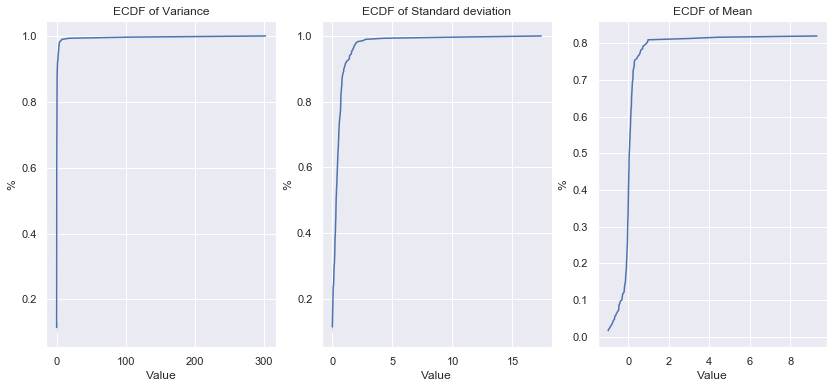

In [168]:
f = plt.subplots(figsize=(14, 6))
sns.set(style="darkgrid")

plt.subplot(131)
x,y = ecdf(df1_jc_pct['var'])
sns.lineplot(x,y).set(title = 'ECDF of Variance', xlabel = 'Value', ylabel = '%' )

plt.subplot(132)
x,y = ecdf(df1_jc_pct['std'])
sns.lineplot(x,y).set(title = 'ECDF of Standard deviation', xlabel = 'Value', ylabel = '%' )

plt.subplot(133)
x,y = ecdf(df1_jc_pct['mean'])
sns.lineplot(x,y).set(title = 'ECDF of Mean', xlabel = 'Value', ylabel = '%' )

#### Histogram

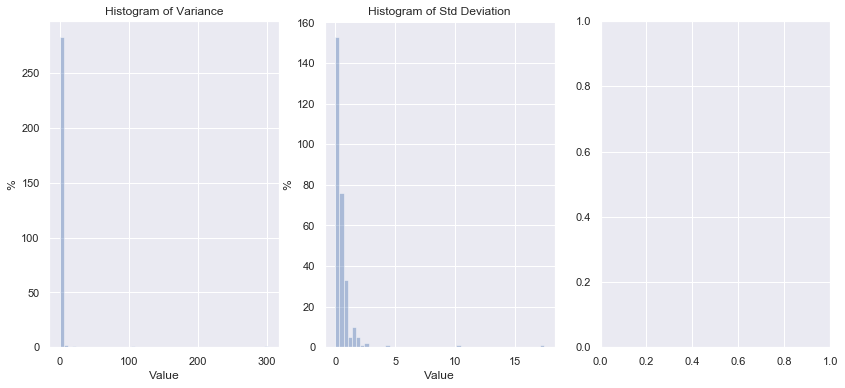

In [169]:
f = plt.subplots(figsize=(14, 6))
sns.set(style="darkgrid")

plt.subplot(131)
sns.distplot(df1_jc_pct['var'],kde=False).set(title = 'Histogram of Variance', xlabel = 'Value', ylabel = '%' )

plt.subplot(132)
sns.distplot(df1_jc_pct['std'],kde=False).set(title = 'Histogram of Std Deviation', xlabel = 'Value', ylabel = '%' )

plt.subplot(133)
#sns.distplot(df1_jc_pct['mean'],kde=False).set(title = 'Histogram of Mean', xlabel = 'Value', ylabel = '%' )


In [170]:
alt.Chart(df_jc_pct).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).mark_bar().encode(
    alt.X('var:Q', bin=True),
    alt.Y('sum(pct):Q', axis=alt.Axis(format='%'))
)

alt.Chart(...)

#### Regionwise

In [171]:
def vsm_plot(Region):
    f = plt.subplots(figsize=(14, 6))
    sns.set(style="darkgrid")

    plt.subplot(131)
    x,y = ecdf(df1_jc_pct[df1_jc_pct['Region'] == Region]['var'])
    sns.lineplot(x,y).set(title = 'ECDF of Variance', xlabel = 'Value', ylabel = '%' )

    plt.subplot(132)
    x,y = ecdf(df1_jc_pct[df1_jc_pct['Region'] == Region]['std'])
    sns.lineplot(x,y).set(title = 'ECDF of Standard deviation', xlabel = 'Value', ylabel = '%' )

    plt.subplot(133)
    x,y = ecdf(df1_jc_pct[df1_jc_pct['Region'] == Region]['mean'])
    sns.lineplot(x,y).set(title = 'ECDF of Mean', xlabel = 'Value', ylabel = '%' )

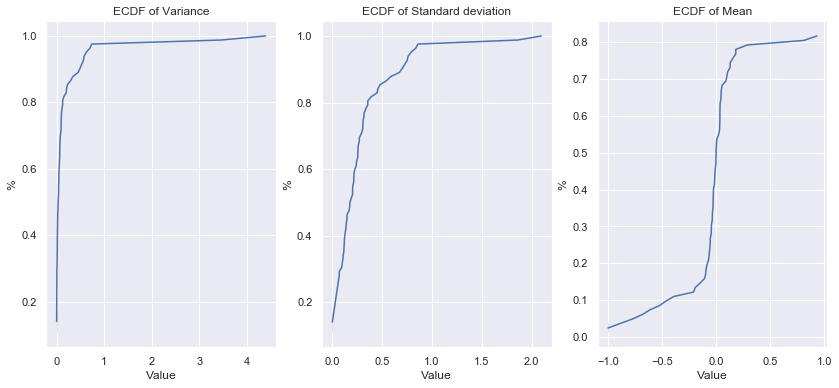

In [172]:
vsm_plot('South')

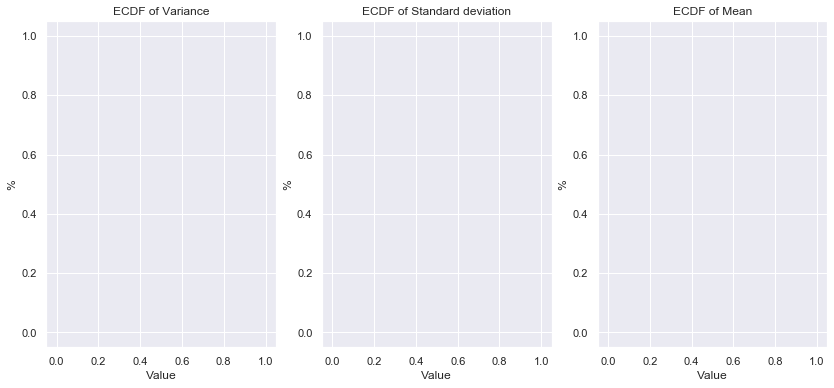

In [173]:
vsm_plot('North')

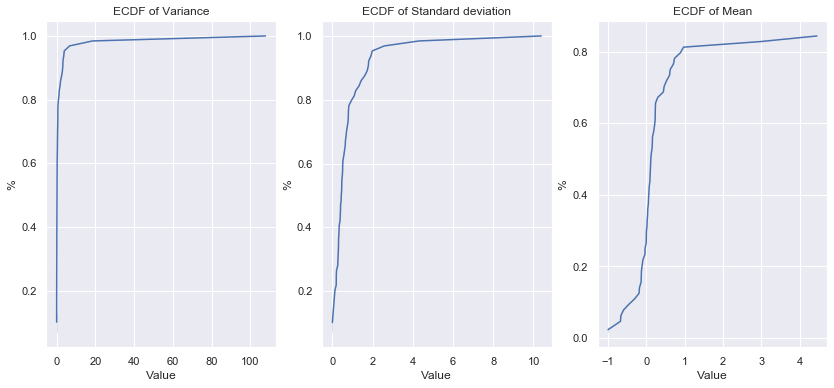

In [174]:
vsm_plot('East')

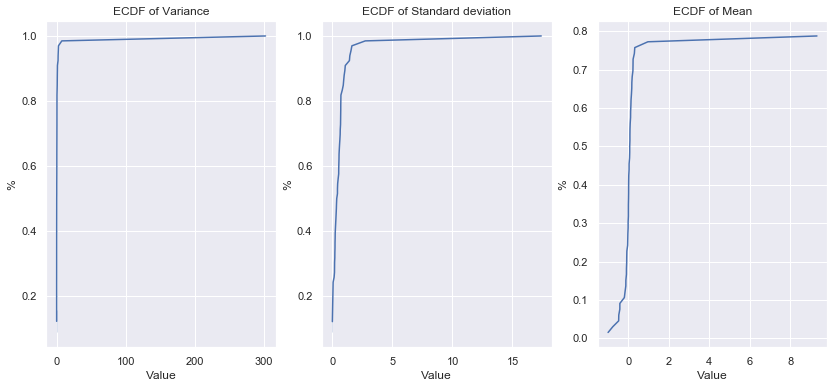

In [175]:
vsm_plot('West')

## Increasing trend in a row of different columns

* To find trend across the months :
    1. Positive difference
    2. Monotonic increase
    3. Simple moving average & positive difference
    4. Exponential moving average & positive difference

* To find consistency across the months :
    1. Use standard deviation 

### Method 1 :  Postive difference

In [176]:
df_jc.head()

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,85.0,119.0,80.0,58.0,50.0
3282,79.0,103.0,86.0,79.0,93.0,46.0
3298,126.0,81.0,63.0,47.0,53.0,62.0
3460,110.0,54.0,97.0,86.0,125.0,0.0
3708,67.0,91.0,94.0,96.0,107.0,171.0


In [177]:
temp1 = (df_jc.T.diff() > 0).cumsum()
# Values will increment if the difference between past and present is positive 

In [178]:
temp1

TSO Code,1488,3282,3298,3460,3708,3970,4494,5241,5729,6472,...,1013986,1013989,1013990,1013991,1013997,1014009,1014013,1014014,1014034,1014053
JC,,,,,,,,,,,,,,,,,,,,,
JC 08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JC 09,1,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
JC 10,2,1,0,1,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
JC 11,2,1,0,1,3,0,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
JC 12,2,2,1,2,4,1,2,2,3,2,...,0,0,0,0,0,0,0,0,0,0
JC 13,2,2,2,2,5,1,2,2,3,3,...,0,0,1,1,1,1,1,1,1,0


In [195]:
temp1.sum().nlargest(30)
# The one with max sum is the one that kept increasing over time 

TSO Code
3708       15
1012322    13
1012625    13
7130       12
7770       12
1010687    12
1011396    12
1012179    12
1012388    12
1013481    12
1013611    12
8171       11
1009785    11
1011147    11
1011527    11
1011542    11
1011977    11
1012331    11
1012362    11
1012366    11
1012550    11
1012742    11
1012853    11
1013525    11
1013531    11
1013741    11
1013789    11
5729       10
7852       10
7920       10
dtype: int64

In [218]:
df_jc_pi = temp1.sum().nlargest(30).to_frame().reset_index()

# Rename column
df_jc_pi.rename(columns={0: 'Increase'},inplace=True)

df_jc_pi_I = df_jc_pi[df_jc_pi['Increase'] >= 11]

pi_list = list(df_jc_pi_I['TSO Code'])

df1_jc = df_jc.reset_index()

df1_jc_pi = df1_jc[df1_jc['TSO Code'].isin(pi_list)]

df1_jc_pi = df1_jc_pi.merge(df_jc_pi)

In [219]:
df1_jc_pi

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase
0,3708,67.0,91.0,94.0,96.0,107.0,171.0,15
1,7130,64.0,87.0,90.0,101.0,69.0,52.0,12
2,7770,87.0,96.0,102.0,97.0,98.0,164.0,12
3,8171,57.0,76.0,93.0,82.0,135.0,72.0,11
4,1009785,76.0,104.0,128.0,52.0,61.0,50.0,11
5,1010687,65.0,89.0,99.0,60.0,93.0,153.0,12
6,1011147,53.0,68.0,29.0,55.0,61.0,66.0,11
7,1011396,49.0,55.0,61.0,75.0,55.0,53.0,12
8,1011527,74.0,117.0,119.0,61.0,77.0,17.0,11
9,1011542,43.0,175.0,56.0,65.0,85.0,106.0,11


### Method 2 :  is_monotonic_increasing

In [183]:
cols = df_jc.T.columns
for col in cols:
    df_jc_mi = df_jc.T.apply(lambda x: x.is_monotonic_increasing)

df_jc_mi

TSO Code
1488       False
3282       False
3298       False
3460       False
3708        True
           ...  
1014009     True
1014013     True
1014014     True
1014034     True
1014053     True
Length: 288, dtype: bool

In [184]:
df_jc_mi = df_jc_mi.to_frame().reset_index()

In [185]:
df_jc_mi.columns

Index(['TSO Code', 0], dtype='object')

In [216]:
# Rename column
df_jc_mi.rename(columns={0: 'Increase'},inplace=True)

df_jc_mi_I = df_jc_mi[df_jc_mi['Increase']==True]

mi_list = list(df_jc_mi_I['TSO Code'])

df1_jc = df_jc.reset_index()

df1_jc_mi = df1_jc[df1_jc['TSO Code'].isin(mi_list)]

df1_jc_mi = df1_jc_mi.merge(df_jc_mi)

In [217]:
df1_jc_mi

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase
0,3708,67.0,91.0,94.0,96.0,107.0,171.0,True
1,8558,0.0,0.0,0.0,0.0,24.0,35.0,True
2,1009130,0.0,0.0,0.0,0.0,0.0,22.0,True
3,1013475,0.0,0.0,73.0,82.0,86.0,102.0,True
4,1013484,0.0,0.0,0.0,0.0,0.0,88.0,True
5,1013495,0.0,0.0,0.0,0.0,0.0,46.0,True
6,1013500,0.0,0.0,0.0,0.0,25.0,30.0,True
7,1013907,0.0,0.0,0.0,61.0,74.0,79.0,True
8,1013921,0.0,0.0,0.0,0.0,0.0,87.0,True
9,1013934,0.0,0.0,0.0,0.0,0.0,0.0,True


### Method 3: Moving average & positive difference

In [187]:
df_jc

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,85.0,119.0,80.0,58.0,50.0
3282,79.0,103.0,86.0,79.0,93.0,46.0
3298,126.0,81.0,63.0,47.0,53.0,62.0
3460,110.0,54.0,97.0,86.0,125.0,0.0
3708,67.0,91.0,94.0,96.0,107.0,171.0
...,...,...,...,...,...,...
1014009,0.0,0.0,0.0,0.0,0.0,69.0
1014013,0.0,0.0,0.0,0.0,0.0,21.0
1014014,0.0,0.0,0.0,0.0,0.0,37.0


In [188]:
df_jc_SMA3 = df_jc.rolling(window=3,axis=1).mean()

In [189]:
cols = df_jc_SMA3.columns
for col in cols:
    df_jc_SMA3_g100 = df_jc_SMA3[df_jc_SMA3[col] > 100]

df_jc_SMA3_g100

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
3708,NaN,NaN,84.000000,93.666667,99.000000,124.666667
6472,NaN,NaN,93.333333,96.666667,95.000000,118.000000
7433,NaN,NaN,109.666667,104.333333,105.333333,105.000000
7770,NaN,NaN,95.000000,98.333333,99.000000,119.666667
8271,NaN,NaN,78.000000,82.000000,89.333333,103.333333
1010194,NaN,NaN,101.666667,111.000000,107.666667,107.666667
1010564,NaN,NaN,119.333333,114.666667,131.666667,112.333333
1010687,NaN,NaN,84.333333,82.666667,84.000000,102.000000
1010876,NaN,NaN,106.333333,99.000000,92.000000,101.000000


### Increasing trend in a row of different columns

In [207]:
temp3 = (df_jc_SMA3_g100.T.diff() > 0).cumsum()

In [208]:
temp

TSO Code,3708,6472,7433,7770,8271,1010194,1010564,1010687,1010876,1011386,...,1011697,1012561,1012695,1012732,1012777,1012993,1013063,1013227,1013448,1013863
JC,,,,,,,,,,,,,,,,,,,,,
JC 08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JC 09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JC 10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JC 11,1,1,0,1,1,1,0,0,0,1,...,0,1,1,1,1,1,1,1,1,1
JC 12,2,1,1,2,2,1,1,1,0,2,...,0,2,1,2,2,2,1,2,2,2
JC 13,3,2,1,3,3,1,1,2,1,3,...,1,3,1,3,3,3,2,3,3,3


In [210]:
temp3.sum().nlargest(20)

TSO Code
3708       6
7770       6
8271       6
1011386    6
1012561    6
1012732    6
1012777    6
1012993    6
1013227    6
1013448    6
1013863    6
1011600    5
6472       4
1013063    4
1010194    3
1010687    3
1012695    3
7433       2
1010564    2
1010876    1
dtype: int64

In [214]:
df_jc_pi_sma = temp3.sum().nlargest(30).to_frame().reset_index()

# Rename column
df_jc_pi_sma.rename(columns={0: 'Increase'},inplace=True)

#df_jc_pi_I = df_jc_pi[df_jc_pi['Increase'] >= 11]

pisma_list = list(df_jc_pi_sma['TSO Code'])

df1_jc = df_jc.reset_index()

df1_jc_pi_sma = df1_jc[df1_jc['TSO Code'].isin(pisma_list)]

df1_jc_pi_sma = df1_jc_pi_sma.merge(df_jc_pi_sma)

In [215]:
df1_jc_pi_sma

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase
0,3708,67.0,91.0,94.0,96.0,107.0,171.0,6
1,6472,82.0,102.0,96.0,92.0,97.0,165.0,4
2,7433,126.0,97.0,106.0,110.0,100.0,105.0,2
3,7770,87.0,96.0,102.0,97.0,98.0,164.0,6
4,8271,74.0,72.0,88.0,86.0,94.0,130.0,6
5,1010194,76.0,119.0,110.0,104.0,109.0,110.0,3
6,1010564,110.0,105.0,143.0,96.0,156.0,85.0,2
7,1010687,65.0,89.0,99.0,60.0,93.0,153.0,3
8,1010876,75.0,135.0,109.0,53.0,114.0,136.0,1
9,1011386,80.0,73.0,78.0,164.0,93.0,82.0,6


### Method 4 : Exponential moving average & positive difference

In [309]:
df_jc_EMA3 = df_jc.ewm(span=3,axis=1).mean()
df_jc_EMA3

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,81.666667,103.000000,90.733333,73.838710,61.730159
3282,79.0,95.000000,89.857143,84.066667,88.677419,67.000000
3298,126.0,96.000000,77.142857,61.066667,56.903226,59.492063
3460,110.0,72.666667,86.571429,86.266667,106.258065,52.285714
3708,67.0,83.000000,89.285714,92.866667,100.161290,136.142857
...,...,...,...,...,...,...
1014009,0.0,0.000000,0.000000,0.000000,0.000000,35.047619
1014013,0.0,0.000000,0.000000,0.000000,0.000000,10.666667
1014014,0.0,0.000000,0.000000,0.000000,0.000000,18.793651


In [312]:
cols = df_jc_EMA3.columns
for col in cols:
    df_jc_EMA3_g100 = df_jc_EMA3[df_jc_EMA3[col] > 100]

temp3 = (df_jc_EMA3_g100.T.diff() > 0).cumsum()

df_jc_pi_ema = temp3.sum().nlargest(30).to_frame().reset_index()

# Rename column
df_jc_pi_ema.rename(columns={0: 'Increase'},inplace=True)

#df_jc_pi_I = df_jc_pi[df_jc_pi['Increase'] >= 11]

piema_list = list(df_jc_pi_ema['TSO Code'])

df1_jc = df_jc.reset_index()

df1_jc_pi_ema = df1_jc[df1_jc['TSO Code'].isin(piema_list)]

df1_jc_pi_ema = df1_jc_pi_ema.merge(df_jc_pi_ema)

In [313]:
df1_jc_pi_ema

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase
0,3708,67.0,91.0,94.0,96.0,107.0,171.0,15
1,6472,82.0,102.0,96.0,92.0,97.0,165.0,12
2,7433,126.0,97.0,106.0,110.0,100.0,105.0,4
3,7618,66.0,31.0,65.0,62.0,129.0,109.0,10
4,7770,87.0,96.0,102.0,97.0,98.0,164.0,12
5,8271,74.0,72.0,88.0,86.0,94.0,130.0,10
6,1009928,103.0,109.0,93.0,88.0,101.0,109.0,8
7,1010194,76.0,119.0,110.0,104.0,109.0,110.0,12
8,1010564,110.0,105.0,143.0,96.0,156.0,85.0,6
9,1010687,65.0,89.0,99.0,60.0,93.0,153.0,12


## Non-zero

In [230]:
df2_jc = df2.pivot(index='TSO Code', columns='JC',values='Target_Ach')

In [231]:
df2_jc

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,85.0,119.0,80.0,58.0,50.0
3282,79.0,103.0,86.0,79.0,93.0,46.0
3298,126.0,81.0,63.0,47.0,53.0,62.0
3460,110.0,54.0,97.0,86.0,125.0,NaN
3708,67.0,91.0,94.0,96.0,107.0,171.0
...,...,...,...,...,...,...
1013997,NaN,NaN,NaN,NaN,NaN,54.0
1014009,NaN,NaN,NaN,NaN,NaN,69.0
1014013,NaN,NaN,NaN,NaN,NaN,21.0


In [287]:
# Keep only the rows with at least 6 non-NA values.
df2_jc.dropna(thresh=6,inplace=True)

In [288]:
df2_jc

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,85.0,119.0,80.0,58.0,50.0
3282,79.0,103.0,86.0,79.0,93.0,46.0
3298,126.0,81.0,63.0,47.0,53.0,62.0
3708,67.0,91.0,94.0,96.0,107.0,171.0
4494,85.0,84.0,81.0,90.0,123.0,42.0
...,...,...,...,...,...,...
1013779,123.0,99.0,80.0,79.0,75.0,53.0
1013787,70.0,91.0,84.0,108.0,111.0,67.0
1013788,129.0,131.0,97.0,94.0,111.0,47.0


### Method 1 : Positive difference

In [289]:
temp1 = (df2_jc.T.diff() > 0).cumsum()

df_jc_pi = temp1.sum().nlargest(30).to_frame().reset_index()

# Rename column
df_jc_pi.rename(columns={0: 'Increase'},inplace=True)

df_jc_pi_I = df_jc_pi[df_jc_pi['Increase'] >= 11]

pi_list = list(df_jc_pi_I['TSO Code'])

df1_jc = df2_jc.reset_index()

df1_jc_pi = df1_jc[df1_jc['TSO Code'].isin(pi_list)]

df1_jc_pi = df1_jc_pi.merge(df_jc_pi)

In [290]:
df1_jc_pi['std'] = df1_jc_pi.iloc[:,1:7].std(axis=1)

df1_jc_pi.sort_values(by='std')

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase,std
12,1012322,59.0,61.0,64.0,74.0,73.0,79.0,13,8.091147
7,1011396,49.0,55.0,61.0,75.0,55.0,53.0,12,9.186947
21,1013531,87.0,89.0,73.0,76.0,84.0,100.0,11,9.703951
13,1012331,80.0,88.0,94.0,93.0,97.0,71.0,11,9.907909
11,1012179,62.0,83.0,93.0,81.0,85.0,95.0,12,11.771434
14,1012362,92.0,103.0,106.0,77.0,112.0,85.0,11,13.437510
6,1011147,53.0,68.0,29.0,55.0,61.0,66.0,11,14.179798
22,1013611,25.0,36.0,59.0,53.0,54.0,62.0,12,14.497126
1,7130,64.0,87.0,90.0,101.0,69.0,52.0,12,18.454448
15,1012366,43.0,105.0,117.0,71.0,78.0,70.0,11,26.628306


### Method 2 : is_monotonic_increasing

In [291]:
cols = df2_jc.T.columns
for col in cols:
    df_jc_mi = df2_jc.T.apply(lambda x: x.is_monotonic_increasing)

In [292]:
df_jc_mi = df_jc_mi.to_frame().reset_index()

# Rename column
df_jc_mi.rename(columns={0: 'Increase'},inplace=True)

df_jc_mi_I = df_jc_mi[df_jc_mi['Increase']==True]

mi_list = list(df_jc_mi_I['TSO Code'])

df1_jc = df2_jc.reset_index()

df1_jc_mi = df1_jc[df1_jc['TSO Code'].isin(mi_list)]

df1_jc_mi = df1_jc_mi.merge(df_jc_mi)

In [293]:
df1_jc_mi

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase
0,3708,67.0,91.0,94.0,96.0,107.0,171.0,True


### Method 3 - Simple moving average & positive difference

In [294]:
df2_jc

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,85.0,119.0,80.0,58.0,50.0
3282,79.0,103.0,86.0,79.0,93.0,46.0
3298,126.0,81.0,63.0,47.0,53.0,62.0
3708,67.0,91.0,94.0,96.0,107.0,171.0
4494,85.0,84.0,81.0,90.0,123.0,42.0
...,...,...,...,...,...,...
1013779,123.0,99.0,80.0,79.0,75.0,53.0
1013787,70.0,91.0,84.0,108.0,111.0,67.0
1013788,129.0,131.0,97.0,94.0,111.0,47.0


In [295]:
df_jc_SMA3 = df2_jc.rolling(window=3,axis=1).mean()
df_jc_SMA3

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,NaN,NaN,93.000000,94.666667,85.666667,62.666667
3282,NaN,NaN,89.333333,89.333333,86.000000,72.666667
3298,NaN,NaN,90.000000,63.666667,54.333333,54.000000
3708,NaN,NaN,84.000000,93.666667,99.000000,124.666667
4494,NaN,NaN,83.333333,85.000000,98.000000,85.000000
...,...,...,...,...,...,...
1013779,NaN,NaN,100.666667,86.000000,78.000000,69.000000
1013787,NaN,NaN,81.666667,94.333333,101.000000,95.333333
1013788,NaN,NaN,119.000000,107.333333,100.666667,84.000000


In [296]:
df_jc_SMA3 = df2_jc.rolling(window=3,axis=1).mean()

cols = df_jc_SMA3.columns
for col in cols:
    df_jc_SMA3_g100 = df_jc_SMA3[df_jc_SMA3[col] > 100]

temp3 = (df_jc_SMA3_g100.T.diff() > 0).cumsum()
    
df_jc_pi_sma = temp3.sum().nlargest(30).to_frame().reset_index()

# Rename column
df_jc_pi_sma.rename(columns={0: 'Increase'},inplace=True)

#df_jc_pi_I = df_jc_pi[df_jc_pi['Increase'] >= 11]

pisma_list = list(df_jc_pi_sma['TSO Code'])

df1_jc = df_jc.reset_index()

df1_jc_pi_sma = df1_jc[df1_jc['TSO Code'].isin(pisma_list)]

df1_jc_pi_sma = df1_jc_pi_sma.merge(df_jc_pi_sma)

### Standard deviation

In [298]:
df1_jc_pi_sma['std'] = df1_jc_pi_sma.iloc[:,1:7].std(axis=1)

In [299]:
df1_jc_pi_sma.sort_values(by='std')

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase,std
2,7433,126.0,97.0,106.0,110.0,100.0,105.0,2,10.230673
14,1012732,87.0,90.0,80.0,108.0,106.0,87.0,6,11.349009
17,1013063,71.0,98.0,87.0,104.0,95.0,112.0,4,14.265343
5,1010194,76.0,119.0,110.0,104.0,109.0,110.0,3,14.854853
4,8271,74.0,72.0,88.0,86.0,94.0,130.0,6,21.039645
16,1012993,97.0,95.0,77.0,103.0,137.0,138.0,6,24.563523
11,1011697,147.0,107.0,89.0,96.0,101.0,150.0,1,26.630809
10,1011600,71.0,68.0,122.0,131.0,100.0,121.0,5,27.286749
19,1013448,67.0,91.0,62.0,112.0,131.0,112.0,6,27.418364
6,1010564,110.0,105.0,143.0,96.0,156.0,85.0,2,27.737460


### Method 4 : Exponential moving average & positive difference

In [301]:
df2_jc

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,85.0,119.0,80.0,58.0,50.0
3282,79.0,103.0,86.0,79.0,93.0,46.0
3298,126.0,81.0,63.0,47.0,53.0,62.0
3708,67.0,91.0,94.0,96.0,107.0,171.0
4494,85.0,84.0,81.0,90.0,123.0,42.0
...,...,...,...,...,...,...
1013779,123.0,99.0,80.0,79.0,75.0,53.0
1013787,70.0,91.0,84.0,108.0,111.0,67.0
1013788,129.0,131.0,97.0,94.0,111.0,47.0


In [308]:
df_jc_EMA3 = df2_jc.ewm(span=3,axis=1).mean()
df_jc_EMA3

JC,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13
TSO Code,,,,,,
1488,75.0,81.666667,103.000000,90.733333,73.838710,61.730159
3282,79.0,95.000000,89.857143,84.066667,88.677419,67.000000
3298,126.0,96.000000,77.142857,61.066667,56.903226,59.492063
3708,67.0,83.000000,89.285714,92.866667,100.161290,136.142857
4494,85.0,84.333333,82.428571,86.466667,105.322581,73.158730
...,...,...,...,...,...,...
1013779,123.0,107.000000,91.571429,84.866667,79.774194,66.174603
1013787,70.0,84.000000,84.000000,96.800000,104.129032,85.269841
1013788,129.0,130.333333,111.285714,102.066667,106.677419,76.365079


In [303]:
cols = df_jc_EMA3.columns
for col in cols:
    df_jc_EMA3_g100 = df_jc_EMA3[df_jc_EMA3[col] > 100]

temp3 = (df_jc_EMA3_g100.T.diff() > 0).cumsum()
    
df_jc_pi_ema = temp3.sum().nlargest(30).to_frame().reset_index()

# Rename column
df_jc_pi_ema.rename(columns={0: 'Increase'},inplace=True)

#df_jc_pi_I = df_jc_pi[df_jc_pi['Increase'] >= 11]

piema_list = list(df_jc_pi_ema['TSO Code'])

df1_jc = df_jc.reset_index()

df1_jc_pi_ema = df1_jc[df1_jc['TSO Code'].isin(piema_list)]

df1_jc_pi_ema = df1_jc_pi_ema.merge(df_jc_pi_ema)

In [305]:
df1_jc_pi_ema['std'] = df1_jc_pi_ema.iloc[:,1:7].std(axis=1)

df1_jc_pi_ema.sort_values(by='std')

,TSO Code,JC 08,JC 09,JC 10,JC 11,JC 12,JC 13,Increase,std
6,1009928,103.0,109.0,93.0,88.0,101.0,109.0,8,8.526429
2,7433,126.0,97.0,106.0,110.0,100.0,105.0,4,10.230673
19,1013063,71.0,98.0,87.0,104.0,95.0,112.0,9,14.265343
7,1010194,76.0,119.0,110.0,104.0,109.0,110.0,12,14.854853
14,1012041,112.0,139.0,92.0,101.0,96.0,100.0,5,17.200775
5,8271,74.0,72.0,88.0,86.0,94.0,130.0,10,21.039645
18,1012993,97.0,95.0,77.0,103.0,137.0,138.0,6,24.563523
12,1011697,147.0,107.0,89.0,96.0,101.0,150.0,3,26.630809
13,1011962,69.0,45.0,58.0,70.0,101.0,117.0,10,27.104735
11,1011600,71.0,68.0,122.0,131.0,100.0,121.0,8,27.286749
